# Import and pre-process datasets

- Rename some columns to remove whitespace and make more intuitive
- Convert lat/longs to numerical

In [169]:
import pandas as pd
UFO_df = pd.read_csv("UFO.csv")
UFO_df.rename(columns={"longitude " : "longitude"}, inplace= True) #Remove trailing whitespace in col name
UFO_df.head()

C:\Users\MikeBrennan\AppData\Local\Temp\ipykernel_24872\1091977574.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  UFO_df = pd.read_csv("UFO.csv")


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [170]:
UFO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [171]:
airports_df = pd.read_csv("airports.csv")
airports_df.rename(columns={"Airport1Latitude" : "Latitude", "Airport1Longitude" : "Longitude"}, inplace= True)
airports_df.head()

,Orig,Name,TotalSeats,Country Name,Latitude,Longitude
0,HEA,Herat,22041.971,Afghanistan,34.206902,62.226700
1,JAA,Jalalabad,6343.512,Afghanistan,34.400002,70.500000
2,KBL,Kabul International,1016196.825,Afghanistan,34.563900,69.213898
3,KDH,Kandahar International,39924.262,Afghanistan,31.506901,65.847504
4,MZR,Mazar-e-Sharif,58326.513,Afghanistan,36.704201,67.208298


In [172]:
#convert lang/long columns to numeric. Set errors to "coerce" and drop na to remove missing values

UFO_df["latitude"] = pd.to_numeric(UFO_df["latitude"], errors = "coerce")
UFO_df["longitude"] = pd.to_numeric(UFO_df["longitude"], errors = "coerce")

UFO_df.dropna(subset=["longitude", "latitude"], inplace = True)

#convert to datetime
UFO_df["datetime"] = UFO_df["datetime"].astype(str).str.replace("24:00", "00:00")
UFO_df["datetime"] = pd.to_datetime(UFO_df["datetime"])

UFO_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


In [173]:
UFO_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80331 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80331 non-null  datetime64[ns]
 1   city                  80331 non-null  object        
 2   state                 74534 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78399 non-null  object        
 5   duration (seconds)    80331 non-null  object        
 6   duration (hours/min)  80331 non-null  object        
 7   comments              80316 non-null  object        
 8   date posted           80331 non-null  object        
 9   latitude              80331 non-null  float64       
 10  longitude             80331 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 7.4+ MB


## Look up nearest airport and calculate distance

Using cKDTree, for each reported sighting find the nearest neighbour in the airports dataset. Get the distance and multiply by 111 for an approximate converstion into kilometres. Note that this gives the distance in Euclidean space; a more precise distance could be calculated using haversine (great circle) distance.

In [174]:
from scipy.spatial import cKDTree

UFO_coordinates = UFO_df[["latitude", "longitude"]]
Airport_coordinates = airports_df[["Latitude", "Longitude"]]

airport_tree = cKDTree(Airport_coordinates)
distances, indices = airport_tree.query(UFO_coordinates)

UFO_df["nearest_airport"] = airports_df.iloc[indices]["Orig"].values
UFO_df["distance_to_airport_km"] = distances * 111 #approximate conversion from degress to kilometres

UFO_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,nearest_airport,distance_to_airport_km
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,AUS,45.840931
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,SAT,20.677352
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,CEG,6.698134
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,CRP,164.303930
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,HNL,17.214843


## Export dataset for use in map visual

- Remove HTML elements from the `comments` column
- Left join `"Orig"` and `"Name"` onto `UFO_df` and create a new column `Airport display name`, which contains the full airport name and international code in brackets, for example: `"London Heathrow (LHR)"`
- Eport as a .csv after removing unnecesarry columns

In [175]:
#Handle HTML encoding issues and export as csv for use in PBI map visual

import html

UFO_df["comments"] = UFO_df["comments"].apply(lambda x: html.unescape(str(x)) if pd.notnull(x) else x)

airport_cols = airports_df[["Orig", "Name"]]
UFO_df = UFO_df.merge(airport_cols, left_on='nearest_airport', right_on='Orig', how='left')
UFO_df["Airport display name"] = UFO_df["Name"] + " (" + UFO_df['nearest_airport'] + ")"


UFO_df.drop(columns=["city", "state", "shape", "duration (seconds)", "duration (hours/min)", "date posted", "nearest_airport", "Orig", "Name"], inplace = True)
UFO_df.to_csv("UFO_pbi_data.csv", index = False)

## The airport hypothesis

> Does proximity to an airport predict frequency of UFO sightings?

Looking at reported sightings within a 300km range of an airport, the below histogram appears to strongly suggest that the closer you are to an airport, the more likely you are to report a UFO sighting. Note the drop at the left of the distribution, suggesting people in extreme proximity to - or actually *at* - an airport are less likely to report a UFO sighting.

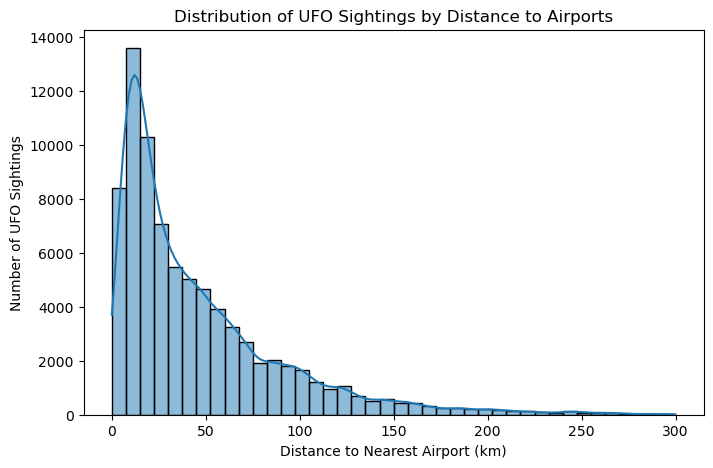

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
UFO_airport300_df = UFO_df[UFO_df["distance_to_airport_km"] < 300]

plt.figure(figsize=(8, 5))
sns.histplot(UFO_airport300_df["distance_to_airport_km"], bins=40, kde=True)
plt.xlabel("Distance to Nearest Airport (km)")
plt.ylabel("Number of UFO Sightings")
plt.title("Distribution of UFO Sightings by Distance to Airports")
plt.show()

## Population density

Airports tend to be located in built-up areas; to confirm the airport hypothesis, the distribution must be normalised by population density. The closer you get to an airport, the frequency of *any* type of human-reported phenomenon - terrestrial or otherwise - could be reasonably expected to go up. If there are more people in an area, there will be more reports.

### Population density datasets

In [177]:
years = range(2000, 2015)
UFO_by_year = {}

for y in years:
    UFO_by_year[y] = UFO_df[(UFO_df["datetime"].dt.year == y) & (UFO_df["country"] == "us")]
    print(f"year: {y} - {len(UFO_by_year[y])} rows")

year: 2000 - 2184 rows
year: 2001 - 2445 rows
year: 2002 - 2439 rows
year: 2003 - 2958 rows
year: 2004 - 3244 rows
year: 2005 - 3228 rows
year: 2006 - 2884 rows
year: 2007 - 3470 rows
year: 2008 - 4017 rows
year: 2009 - 3677 rows
year: 2010 - 3548 rows
year: 2011 - 4379 rows
year: 2012 - 6320 rows
year: 2013 - 6056 rows
year: 2014 - 1964 rows


In [178]:
import geopandas as gpd
import rasterio

tif_paths = {
    2000: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2000_1km.tif",
    2001: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2001_1km.tif",
    2002: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2002_1km.tif",
    2003: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2003_1km.tif",
    2004: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2004_1km.tif",
    2005: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2005_1km.tif",
    2006: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2006_1km.tif",
    2007: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2007_1km.tif",
    2008: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2008_1km.tif",
    2009: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2009_1km.tif",
    2010: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2010_1km.tif",
    2011: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2011_1km.tif",
    2012: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2012_1km.tif",
    2013: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2013_1km.tif",
    2014: r"C:\Users\MikeBrennan\OneDrive - Optimus Education\Documents\Data Science\DSPP\Projects\UFO\usa_pd_2014_1km.tif"
}


UFO_gdfs = {}

for year, tif_path in tif_paths.items():
    gdf = gpd.GeoDataFrame(
    UFO_by_year[year],
    geometry=gpd.points_from_xy(UFO_by_year[year].longitude, UFO_by_year[year].latitude),
    crs="EPSG:4326" #specify the coordinate reference system used in the .tif
    )

    with rasterio.open(tif_path) as src:
        coords = [(pt.x, pt.y) for pt in gdf.geometry]
        values = [val[0] if val else None for val in src.sample(coords)]

    gdf["pop_density"] = values
    gdf = gdf.dropna(subset=["pop_density"])
    gdf["adjusted_sighting"] = 1 / gdf["pop_density"]
    UFO_gdfs[year] = gdf

UFO_gdfs[2009].head()

,datetime,country,comments,latitude,longitude,distance_to_airport_km,Airport display name,geometry,pop_density,adjusted_sighting
203,2009-10-10 12:00:00,us,"metallic egg shaped craft above crested butte,...",38.869722,-106.987222,37.659995,Gunnison County (GUC),POINT (-106.98722 38.86972),937.920532,0.001066
204,2009-10-10 12:42:00,us,In't see nothing in the park,36.153889,-95.992500,12.408002,Tulsa International (TUL),POINT (-95.9925 36.15389),385.352142,0.002595
205,2009-10-10 16:24:00,us,Second sighting was only 150 feet away. Obser...,34.111111,-109.290833,277.200107,Mesa Gateway Airport (AZA),POINT (-109.29083 34.11111),656.336853,0.001524
206,2009-10-10 19:30:00,us,It looked sort of lime green. It appeared to ...,36.728056,-76.583889,39.984205,Norfolk NS (Chambers Field) (NGU),POINT (-76.58389 36.72806),1339.476196,0.000747
207,2009-10-10 20:30:00,us,UFO over Disneyland.,33.835278,-117.913611,18.457842,John Wayne Airport (SNA),POINT (-117.91361 33.83528),4380.538574,0.000228


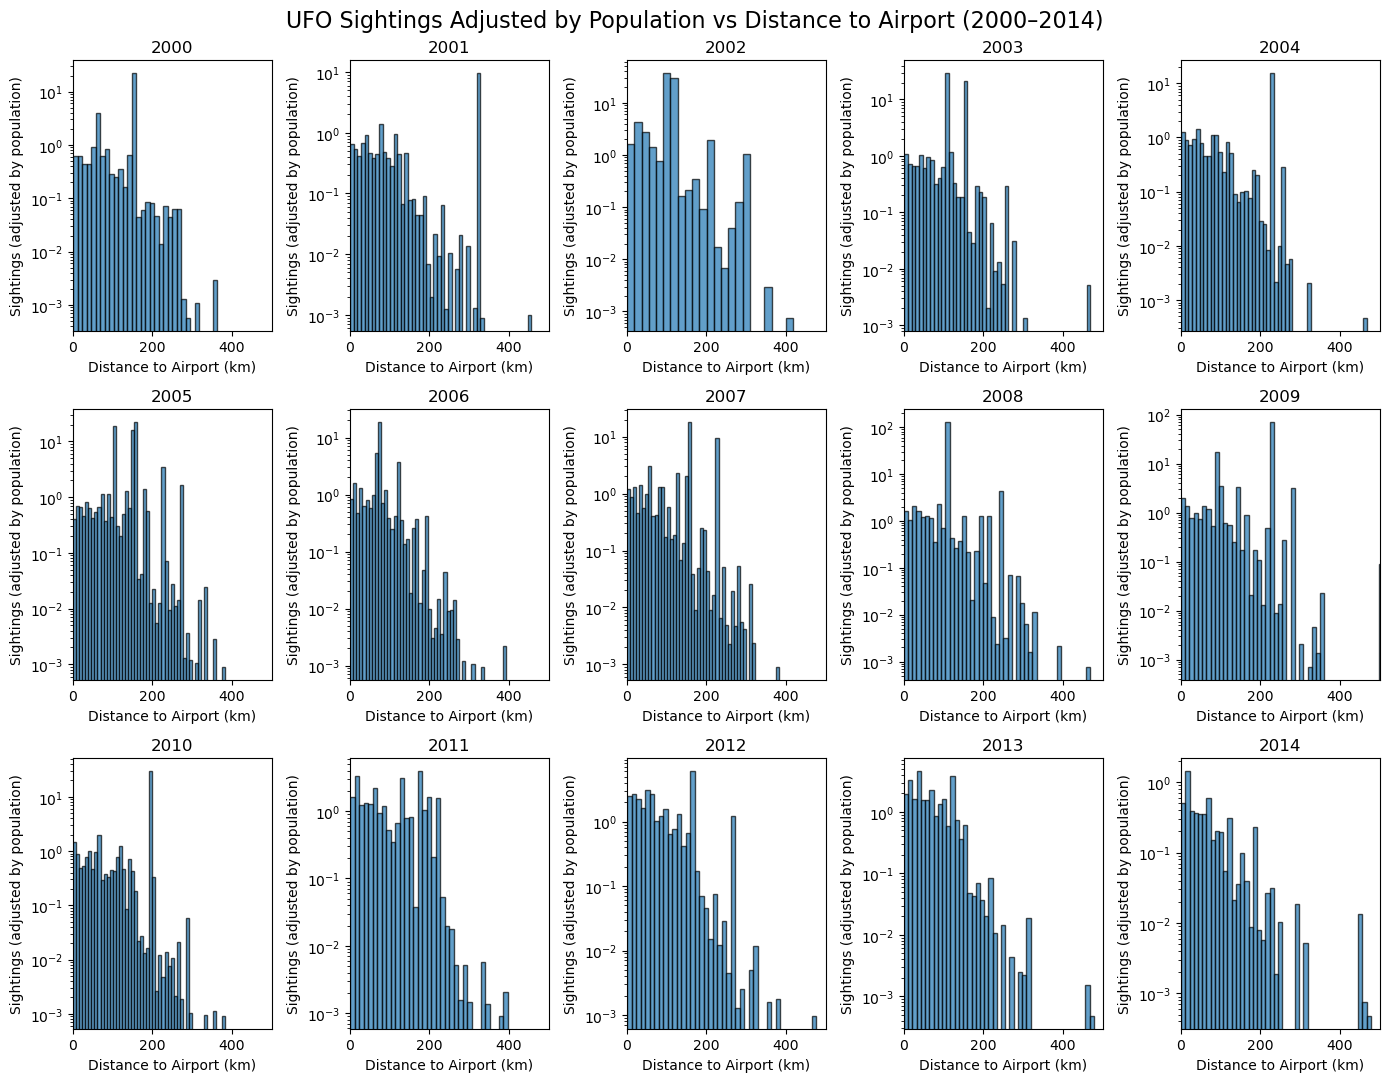

In [179]:
fig, axes = plt.subplots(3, 5, figsize=(14, 11))
axes = axes.flatten()


for idx, (year, gdf) in enumerate(UFO_gdfs.items()):
    ax = axes[idx]

    ax.hist(
        gdf["distance_to_airport_km"], 
        bins=50, 
        weights=gdf["adjusted_sighting"], 
        alpha=0.7, 
        edgecolor="black"
    )

    ax.set_xlabel("Distance to Airport (km)")
    ax.set_ylabel("Sightings (adjusted by population)")
    ax.set_title(year)
    ax.set_yscale("log")
    ax.set_xlim(0, 500)

plt.suptitle("UFO Sightings Adjusted by Population vs Distance to Airport (2000–2014)", fontsize=16)
plt.tight_layout()
plt.show()

In [180]:
all_gdf = pd.concat(UFO_gdfs.values(), ignore_index=True)

plt.figure(figsize=(10, 6))
plt.hist(
    all_gdf["distance_to_airport_km"],
    bins=50,
    weights=all_gdf["djusted_sighting"],
    alpha=0.7,
    edgecolor="black"
)

plt.xlabel("Distance to Airport (km)")
plt.ylabel("Sightings (adjusted by population)")
plt.title("Overall UFO Sightings vs Distance to Airport (2000–2014, adjusted by population)")
plt.tight_layout()
plt.show()

KeyError: 'djusted_sighting'

<Figure size 1000x600 with 0 Axes>

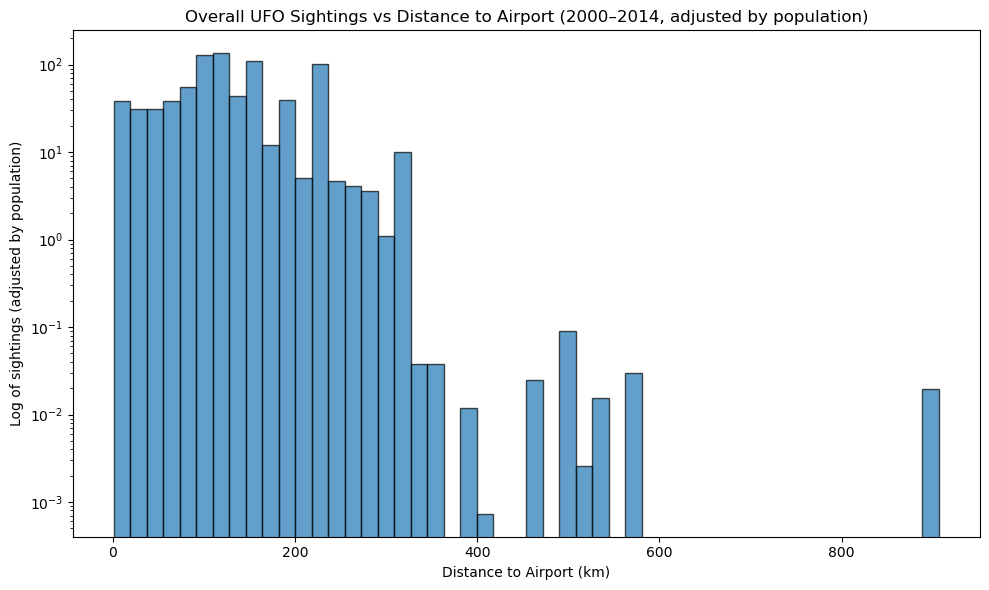

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(
    all_gdf["distance_to_airport_km"],
    bins=50,
    weights=all_gdf["adjusted_sighting"],
    alpha=0.7,
    edgecolor = "black"
    )

plt.yscale("log")

plt.xlabel("Distance to Airport (km)")
plt.ylabel("Log of sightings (adjusted by population)")
plt.title("Overall UFO Sightings vs Distance to Airport (2000–2014, adjusted by population)")
plt.tight_layout()
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[all_gdf["latitude"].mean(), all_gdf["longitude"].mean()], zoom_start=4)

heat_data = all_gdf[["latitude", "longitude", "adjusted_sighting"]].dropna().values.tolist()
HeatMap(
    heat_data,
    radius = 7,
    blur=7,
).add_to(m)

m

In [ ]:
import folium
from folium.plugins import HeatMap

m_2004 = folium.Map(location=[UFO_gdfs[2004]["latitude"].mean(), UFO_gdfs[2004]['longitude'].mean()], zoom_start=4)

heat_data = UFO_gdfs[2004][["latitude", "longitude", "adjusted_sighting"]].dropna().values.tolist()
HeatMap(
    heat_data,
    radius = 10,
    blur=5,
).add_to(m_2004)

m_2004

In [ ]:
m.save("heatmap.html")
m_2004.save("heatmap_2004.html")

In [ ]:
all_gdf.columns

Index(['datetime', 'country', 'comments', 'latitude', 'longitude',
       'distance_to_airport_km', 'Airport display name', 'geometry',
       'pop_density', 'adjusted_sighting'],
      dtype='object')

In [ ]:
import numpy as np
import statsmodels.api as sm

#Split sightings into 10-km bins (according to "distance_from_airport_km"
bin_edges = np.arange(0, all_gdf['distance_to_airport_km'].max() + 10, 10)
all_gdf['distance_bin'] = pd.cut(all_gdf['distance_to_airport_km'], bins=bin_edges)

#Aggregate number of sightings and mean "adjusted_sighting" (inverse population density) per bin
agg = (
    all_gdf.groupby('distance_bin')
    .agg(
        sighting_count=('distance_to_airport_km', 'count'),
        mean_inverse_pop_density=('adjusted_sighting', 'mean')
    )
    .reset_index()
)

# Calculate midpoints
agg['bin_midpoint'] = agg['distance_bin'].apply(lambda x: x.left + (x.right - x.left) / 2)

# Get rid of inf and NaN values
reg_data = agg[['bin_midpoint', 'mean_inverse_pop_density', 'sighting_count']].replace([np.inf, -np.inf], np.nan).dropna()

X = sm.add_constant(reg_data[['bin_midpoint', 'mean_inverse_pop_density']])
y = reg_data['sighting_count']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         sighting_count   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     10.56
Date:                Mon, 05 May 2025   Prob (F-statistic):           0.000192
Time:                        09:09:53   Log-Likelihood:                -404.74
No. Observations:                  45   AIC:                             815.5
Df Residuals:                      42   BIC:                             820.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\MikeBrennan\AppData\Local\Temp\ipykernel_24872\4187906901.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_gdf.groupby('distance_bin')
